# Titanic Survival Prediction

###Abstract
The Titanic Survival Prediction problem statement is a binary classification problem. This notebook aims to analyze the various trends in the titanic survivors dataset and predict the survival (or not) of the various passengers of the titanic. We try to answer the question : “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). The same will be used as a submission to the Kaggle competition at :
https://www.kaggle.com/c/titanic .
The dataset is provided by Kaggle at https://www.kaggle.com/c/titanic/data, and the data is split into train.csv and test.csv.

The features we have available in this dataset are :

* pclass :	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex :	Gender	
* Age :	Age in years	
* sibsp :	Number of siblings / spouses aboard the Titanic	
* parch	: Number of parents / children aboard the Titanic	
* ticket :	Ticket number	
* fare :	Passenger fare	
* cabin :	Cabin number	
* embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

We attempt to predict 
* Survived : Whether the passenger survived or not (0 = Did not survive, 1 = Survived)

We will be making use of two different Machine Learning algorithms to predict the survival column values and use hyperparameter tuning to better the respective algorithms to arrive at the best accuracy score possible.

In [ ]:
#Importing required libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Label Encoding and OneHot encoding

from sklearn import preprocessing as pp

In [ ]:
#Reading the dataset available at UCI ML library
data_train="https://raw.githubusercontent.com/shshyam147/DSEngineering/main/Titanic%20Survival%20Prediction/train.csv"
data_test= "https://raw.githubusercontent.com/shshyam147/DSEngineering/main/Titanic%20Survival%20Prediction/test.csv"
train_df = pd.read_csv(data_train)
test_df = pd.read_csv(data_test)
dataset=pd.concat([train_df,test_df],sort=True).reset_index(drop=True)
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


We will now take a look at the data, number of rows, the columns and the data types.

In [ ]:
print("Total Dataset Shape:",dataset.shape)
print("Train Dataset Shape:",train_df.shape)  


Total Dataset Shape: (1309, 12)
Train Dataset Shape: (891, 12)


In [ ]:
dataset.columns.values

array(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see the range of data for each of the numerical features and their five point summaries. An interesting finding is that the minimum value of Fare is 0.We will come back to analyze if these are valid fares later on.

We will now take a look at the categorical features, to see the unique counts and most occuring values.

In [ ]:
dataset.describe(include=['object'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


We can see that the Name Kelly, Mr. James is occuring twice. We will check to see if the two records are true duplicates. We will also check for any other such occurences.

In [ ]:
Dup_names = dataset.Name.value_counts()
Dup_names[Dup_names > 1]

Kelly, Mr. James        2
Connolly, Miss. Kate    2
Name: Name, dtype: int64

In [ ]:
dataset.loc[((dataset['Name']== 'Kelly, Mr. James') | (dataset['Name']=='Connolly, Miss. Kate'))]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
289,22.0,NaN,Q,7.7500,"Connolly, Miss. Kate",0,290,3,female,0,1.0,370373
696,44.0,NaN,S,8.0500,"Kelly, Mr. James",0,697,3,male,0,0.0,363592
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972


We have verified that the two duplicate names are infact of two separate passengers since the values of all the other features differ. These four records are hence, valid records.

We will now check for unique values of Embarked column. As explained by the data dictionary we should be expecting to see values as S, C and Q.

In [ ]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

###Checking for Missing values

We will now check for missing values and invalid values in the features.
First we will check for NULLs.

In [ ]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,1014,77.5
Survived,418,31.9
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1
Ticket,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


We will now check for zeroes.


In [ ]:
(dataset==0).sum(axis=0,numeric_only=True)

Age               0
Cabin             0
Embarked          0
Fare             17
Name              0
Parch          1002
PassengerId       0
Pclass            0
Sex               0
SibSp           891
Survived        549
Ticket            0
dtype: int64

There are 17 fares that are 0, which does seems like an unlikely scenario, we will dig deeper into this.

In [ ]:
dataset.loc[dataset['Fare'] == 0]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,LINE
263,40.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE
277,NaN,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,LINE
413,NaN,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853
466,NaN,NaN,S,0.0,"Campbell, Mr. William",0,467,2,male,0,0.0,239853
481,NaN,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,male,0,0.0,239854
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,LINE
633,NaN,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052


There are 17 passengers with Fare as 0, there are 4 with the Ticket value as LINE. Upon research, we were able to find that ticket value LINE means that the passenger was an employee of the ship and hence gets a free ride, i.e. Fare =0.
For the other passengers we can assume that the Fare of 0 is an incorrect record, and we will treat this as missing Fare. We will hence convert the zeroes to NaN.

In [ ]:
dataset['Fare']=np.where(((dataset['Ticket']!='LINE') & (dataset['Fare']==0)),np.nan,dataset['Fare'])

In [ ]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Cabin,1014,77.5
Survived,418,31.9
Age,263,20.1
Fare,14,1.1
Embarked,2,0.2
Ticket,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


###Exploratory Data Analysis

We will now take a look at how the data is distributed and decide on how to impute these missing values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

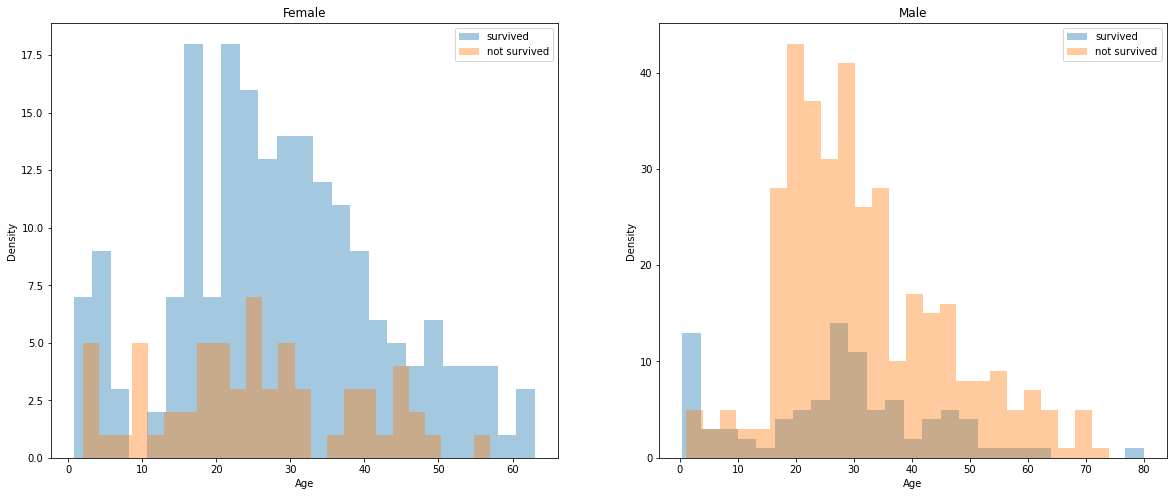

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
women = dataset[dataset['Sex']=='female']
men = dataset[dataset['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=25, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=25, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_ylabel('Density')
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=25, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=25, label = not_survived, ax = axes[1], kde = False)
ax.set_ylabel('Density')
ax.legend()
_ = ax.set_title('Male')

We can see that the general trend is that the sex tends to contribute significantly to whether a passenger survived or not. Females tend to survive overall better than males. Moreover, some ages seem to trend upwards in terms of survival. 

This could mean that age can also be an important feature in predicting survival of passengers and I will bucket the ages and then use it as a feature rather than as a continuous value.


Text(0.5, 1.0, 'PClass vs Survival')

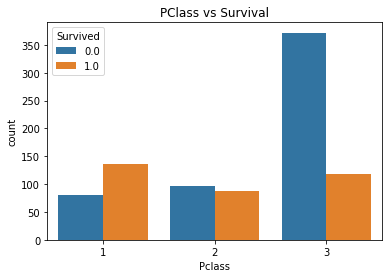

In [ ]:
ax=sns.countplot(data=dataset, x='Pclass', hue='Survived')
ax.set_title('PClass vs Survival')

In [ ]:
dataset.groupby('Pclass').mean()

,Age,Fare,Parch,PassengerId,SibSp,Survived
Pclass,,,,,,
1,39.159930,89.447482,0.365325,672.492260,0.436533,0.629630
2,29.506705,21.648108,0.368231,671.566787,0.393502,0.472826
3,24.816367,13.302889,0.400564,640.558533,0.568406,0.242363


We can see that Pclass attribute impacts the survival significantly.
Almost 63% of 1st class passengers survived compared to a meagre 24% of 3rd class passengers.

Another interesting observation is the average of age is highest in 1st class and lowest in 3rd class. We can visualize this further below:


Text(0.5, 1.0, 'PClass vs Age trends')

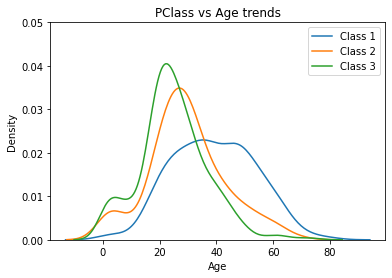

In [ ]:
ax.set_title('Class and Age relation')
ax = sns.kdeplot(dataset[dataset['Pclass']==1].Age.dropna(),label = 'Class 1')
ax = sns.kdeplot(dataset[dataset['Pclass']==2].Age.dropna(), label ='Class 2')
ax = sns.kdeplot(dataset[dataset['Pclass']==3].Age.dropna(), label = 'Class 3')
ax.legend()
ax.set_ylim(0,0.05)
ax.set_title('PClass vs Age trends')

We can see that there seems to be a correlation between Pclass and Age. The peak of age is youngest of pclass 3 and highest for pclass 1. We can check if this difference in average age somehow adversely affects the survival rate for the different Pclasses.

(0.0, 100.0)

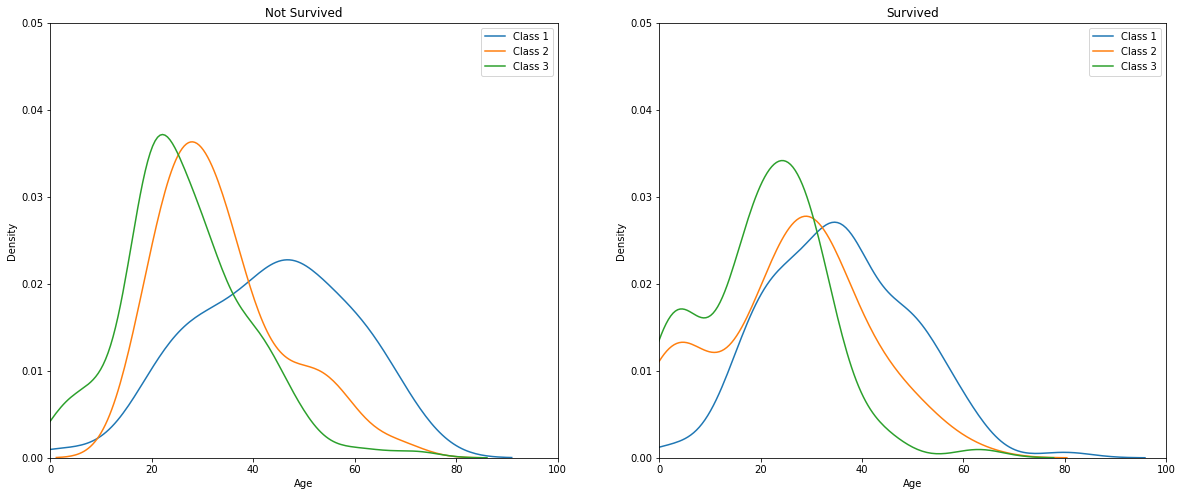

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
notsurvived = dataset[dataset['Survived']==0]
survived = dataset[dataset['Survived']==1]
ax = sns.kdeplot(notsurvived[notsurvived['Pclass']==1].Age.dropna(), label = 'Class 1', ax = axes[0])
ax = sns.kdeplot(notsurvived[notsurvived['Pclass']==2].Age.dropna(), label ='Class 2', ax = axes[0])
ax = sns.kdeplot(notsurvived[notsurvived['Pclass']==3].Age.dropna(), label = 'Class 3', ax = axes[0])
ax.legend()
ax.set_ylim(0,0.05)
ax.set_xlim(0,100)
ax.set_title('Not Survived')
ax = sns.kdeplot(survived[survived['Pclass']==1].Age.dropna(),label = 'Class 1', ax = axes[1])
ax = sns.kdeplot(survived[survived['Pclass']==2].Age.dropna(), label ='Class 2', ax = axes[1])
ax = sns.kdeplot(survived[survived['Pclass']==3].Age.dropna(), label = 'Class 3', ax = axes[1])
ax.legend()
_ = ax.set_title('Survived')
ax.set_ylim(0,0.05)
ax.set_xlim(0,100)

It is clearly visible that irrespective of age, the mortality in pclass 2 and 3 remains high. Except for a peak at children ages - this can be explained by the fact that women and children were given higher priority to lifeboats.

However in the case of 1st class passengers the survival rate dips only for older ages. We can say that if you're a 1st class passenger and young (20-45 age) you will most probably survive the shipwreck!

Text(0.5, 1.0, 'Embarked vs Survival')

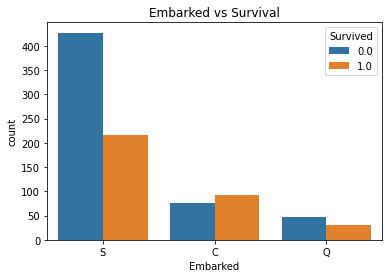

In [ ]:
ax=sns.countplot(data=dataset, x='Embarked', hue='Survived')
ax.set_title('Embarked vs Survival')

Another interesting trend observed is that from the embarkation point of C, more people survived than not. This could also be because more women embarked at C or more 1st class members embarked at C.

Text(0.5, 1.0, 'SibSp vs Survival')

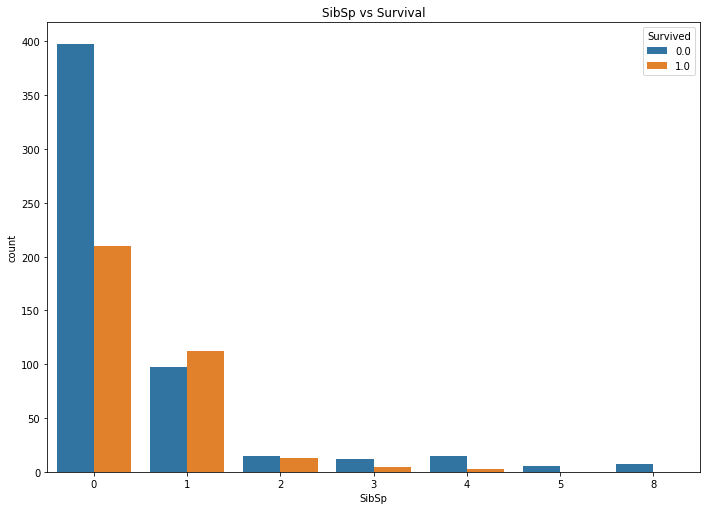

In [ ]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)
ax=sns.countplot(data=dataset, x='SibSp', hue='Survived',ax=ax)
ax.legend(loc='upper right',title='Survived')
ax.set_title('SibSp vs Survival')


Text(0.5, 1.0, 'Parch vs Survival')

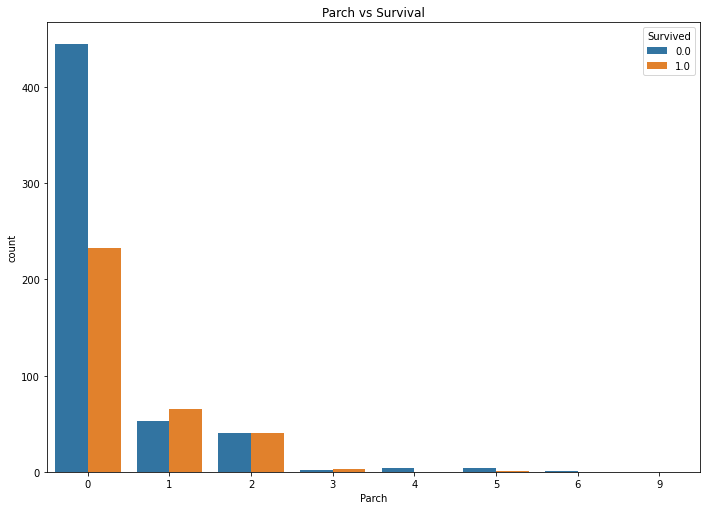

In [ ]:
a4_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)
ax=sns.countplot(ax=ax,data=dataset, x='Parch', hue='Survived')
ax.legend(loc='upper right',title='Survived')
ax.set_title('Parch vs Survival')

We can see that people who were accompanied, (either by spouse,sibling or parent,child) tends to survive more than people traveling alone. However survival also trends down as family size increases. Specifically after SibSp or Parch >=4.

We can try and visualize this trend by using a calculated column - IsAlone

In [ ]:
accompany_df=dataset.copy()
accompany_df['IsAlone']=np.where(((accompany_df['SibSp']==0) & (accompany_df['Parch']==0)),1,0)

(0.0, 360.0)

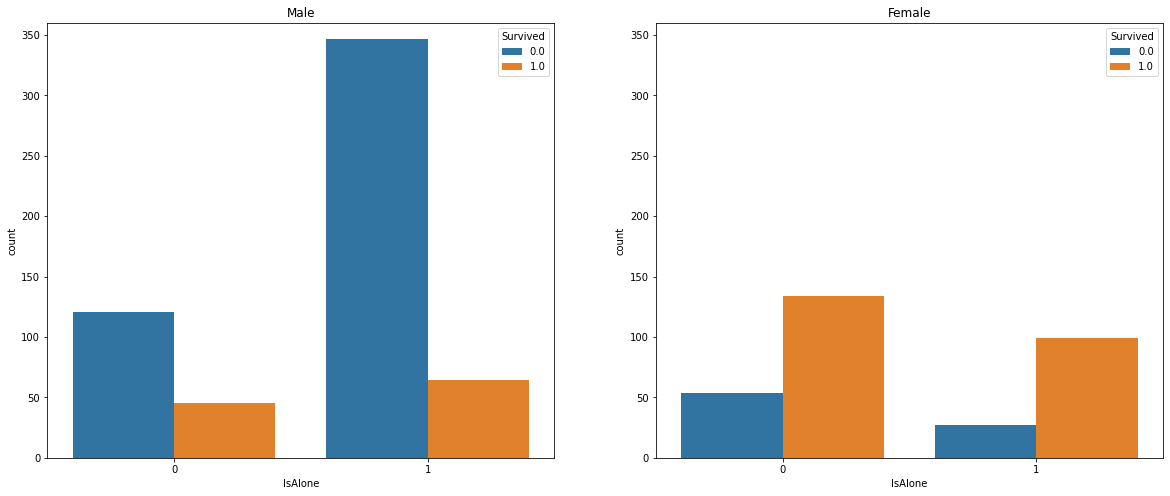

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
ax=sns.countplot(data=accompany_df[accompany_df['Sex']=='male'], x='IsAlone', hue='Survived',ax=axes[0])
ax.set_title('Male')
ax.set_ylim(0,360)
ax=sns.countplot(data=accompany_df[accompany_df['Sex']=='female'], x='IsAlone', hue='Survived',ax=axes[1])
ax.set_title('Female')
ax.set_ylim(0,360)


For men, being accompanied seems to increase their likelihood of 
survival.

We know that on the Titanic, passengers who were women or children were given priority to board the lifeboats, but we also know that women and children in the lower decks were the last to reach the lifeboats and by then most lifeboats had already been deployed.

We will check to see the survival by visualizing this group.

(0.0, 40.0)

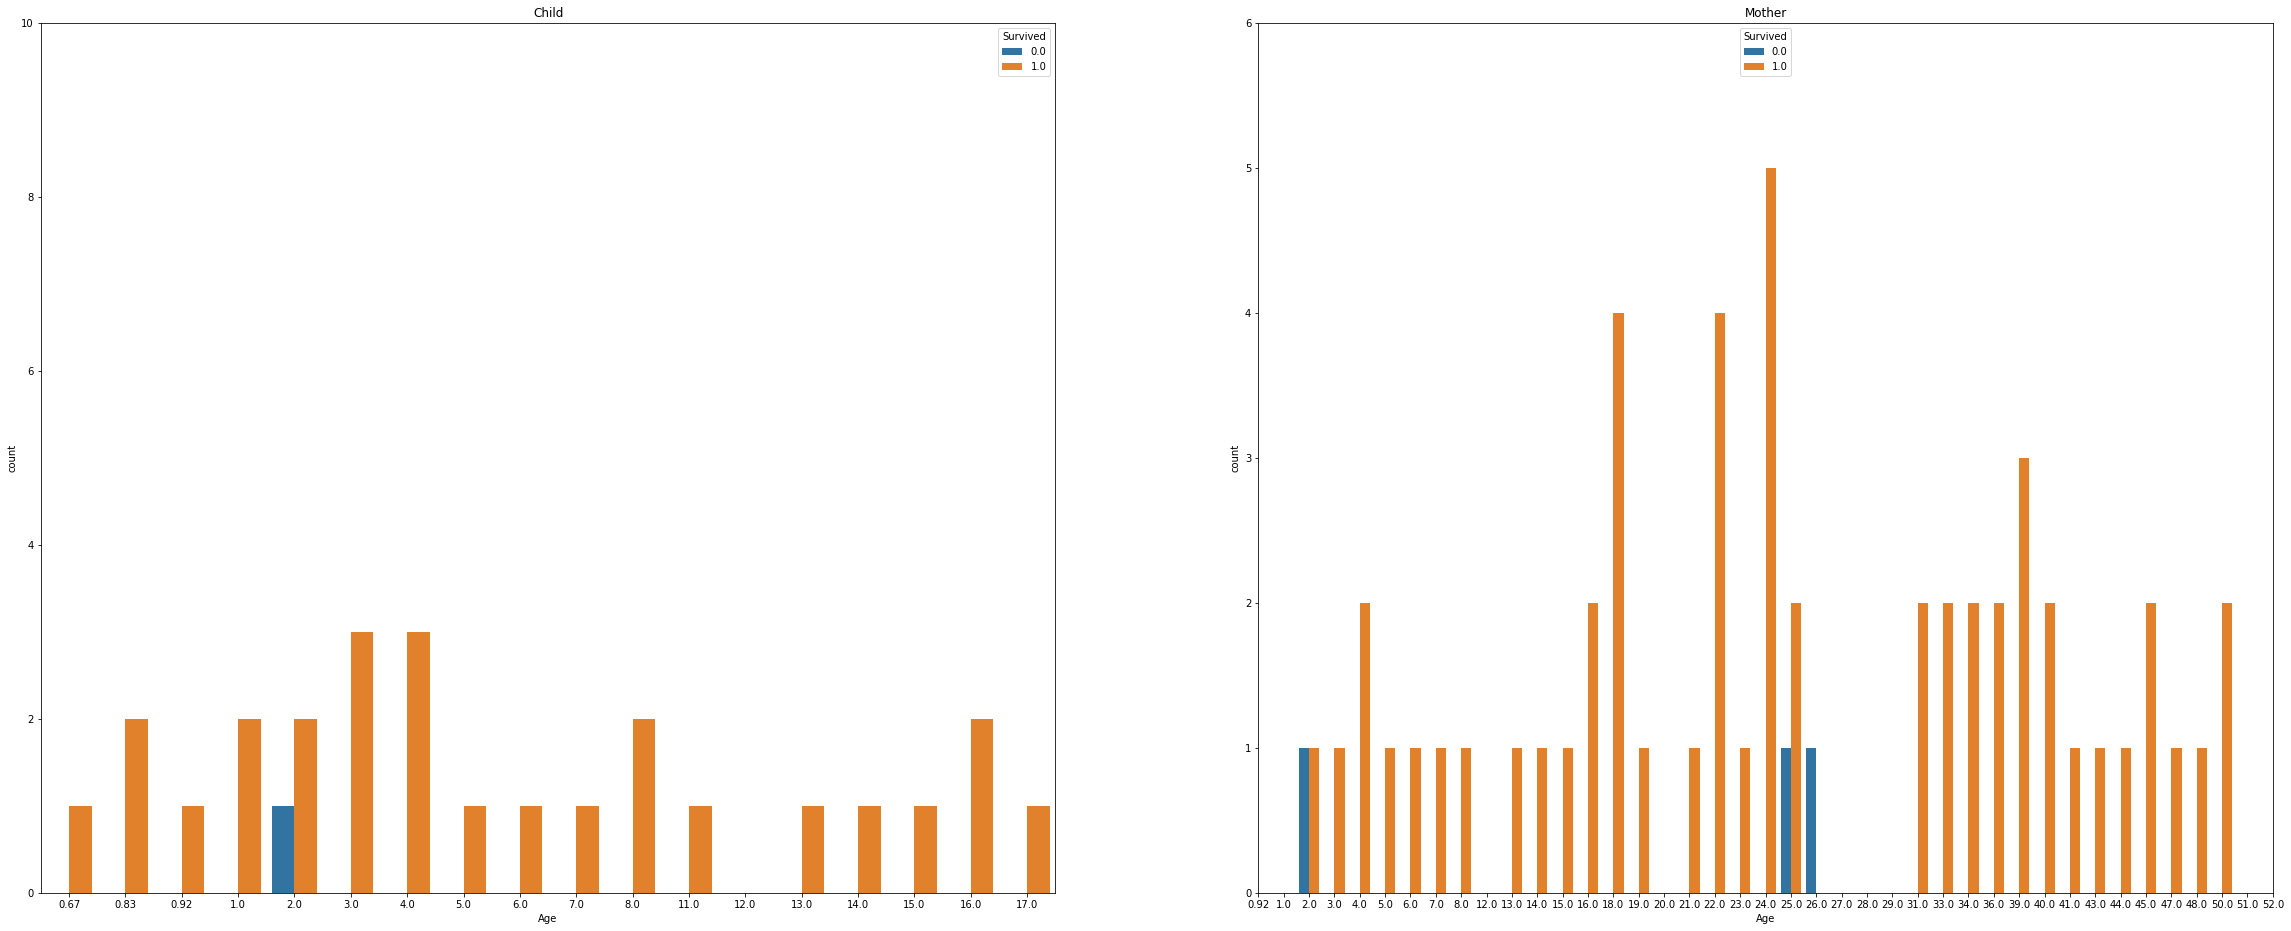

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(40, 16))
ax=sns.countplot(data=dataset[ (dataset['Parch']>=1) & (dataset['Age']<18.0) & (dataset['Pclass']!=3)], x='Age',hue='Survived',ax=axes[0])
ax.set_title('Child')
ax.set_ylim(0,10)
ax=sns.countplot(data=dataset[(dataset['Sex']=='female')  & (dataset['Parch']>=1) & (dataset['Pclass'] !=3)], x='Age',hue='Survived',ax=axes[1])
ax.set_title('Mother')
ax.set_ylim(0,6)
ax.set_xlim(0,40)

Although low in number we are seeing 90% + survival chances for a child under 18 or a women accompanied by a child (Parch>1) in the upper classes (Pclass != 3)

Text(0.5, 1.0, 'Fare vs Survival')

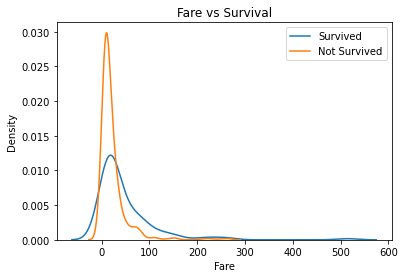

In [ ]:
survived = dataset[dataset['Survived']==1]
not_survived = dataset[dataset['Survived']==0]

ax=sns.kdeplot(survived['Fare'],label='Survived')
ax=sns.kdeplot(not_survived['Fare'],label='Not Survived')
ax.legend()
ax.figsize=(20, 8)
ax.set_title('Fare vs Survival')

As it's clearly visible, for lower fares passengers are more likely to not survive however as fare increases, survival is more likely.

###Missing Value treatment
We will now impute for missing values, as discussed and seen earlier - we have missing values in three columns, embarked, age, cabin and fare.

We will first attempt to fill in missing values for Age.

In [ ]:
print("Missings for age in the dataset :",str(dataset['Age'].isnull().sum()))
print("Percentage of Age missing :",str(round(dataset['Age'].isnull().sum()/len(dataset)*100,0)))

Missings for age in the dataset : 263
Percentage of Age missing : 20.0


Before we impute the data for age, or blindly make median age as the missing vlaues, we will check to see if age has a correlation with features such as PClass and Sex.

In [ ]:
print("Median for age by Pclass and Sex:",dataset.groupby(['Pclass','Sex'])['Age'].median())

Median for age by Pclass and Sex: Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64


Since the median ages differ for each Pclass and Sex, we will fill in the missing values using the median age for the particular Pclass and Sex.

In [ ]:
dataset['Age']=dataset.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [ ]:
print("Missings for age in the dataset :",str(dataset['Age'].isnull().sum()))
print("Percentage of Age missing :",str(round(dataset['Age'].isnull().sum()/len(dataset)*100,0)))

Missings for age in the dataset : 0
Percentage of Age missing : 0.0


We will now fill in data for missing Embarked values.

In [ ]:
dataset.loc[dataset['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [ ]:
dataset.loc[(dataset['Pclass']==1) & (dataset['SibSp']==0) & (dataset['Parch']==0)]['Embarked'].value_counts()

S    93
C    65
Name: Embarked, dtype: int64

Since S is the most occuring Embarked value for similar passengers of same Pclass, SibSp and Parch values, we will fill in the value as S.

In [ ]:
dataset.loc[dataset['Embarked'].isnull(),'Embarked']='S'
print("Missings for Embarked in the dataset :",str(dataset['Embarked'].isnull().sum()))

Missings for Embarked in the dataset : 0


We will now fill in data for missing Fares.

In [ ]:
print("Missings for Fare in the dataset :",str(dataset['Fare'].isnull().sum()))

Missings for Fare in the dataset : 14


Since he travelled 3rd class from Southampton, we can fill in the fare values as per other passengers with similar travel itinerary.


In [ ]:
print("Median for fare by Pclass,SibSp,Parch, Embarked:\n",dataset.groupby(['Pclass','SibSp','Parch','Embarked'])['Fare'].median())

Median for fare by Pclass,SibSp,Parch, Embarked:
 Pclass  SibSp  Parch  Embarked
1       0      0      C            49.50420
                      S            30.50000
               1      C            61.97920
                      S            77.28750
               2      C           112.07915
                                    ...    
3       4      1      Q            29.12500
                      S            39.68750
               2      S            31.27500
        5      2      S            46.90000
        8      2      S            69.55000
Name: Fare, Length: 73, dtype: float64


In [ ]:
dataset['Fare']=dataset.groupby(['Pclass','SibSp','Parch','Embarked'])['Fare'].apply(lambda x:x.fillna(x.median()))
print("Missings for Fare in the dataset :",str(dataset['Fare'].isnull().sum()))

Missings for Fare in the dataset : 0


Lets take a look at the cabin variable - we saw that over 77% of cabin values are empty - we can either drop the column altogether or try to salvage whatever data we have available.

In [ ]:
print("Missings for Cabin in the dataset :",str(dataset['Cabin'].isnull().sum()))

Missings for Cabin in the dataset : 1014


In [ ]:
display(dataset['Cabin'].unique())

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Here the first letter stands for the deck and with a bit of research we can get to know that different decks meant different levels on the ship, and we can assume would have affected the accesibility to the lifeboats. Hence let's divide the decks into upper, middle, lower and not found.

In [ ]:
dataset['Deck']=dataset['Cabin'].apply (lambda x: x[0] if pd.notnull(x) else 'M')
display(dataset['Deck'].value_counts())


M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [ ]:
dataset.loc[dataset['Deck']=='T']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784,T


Since there is no relevant information about what deck T stands for, we have checked and seen that the passenger with Deck T is a first class passenger, research informs that first class passengers are in Decks A, B or C. Since this passenger did not survive, we can assign them to deck C, i.e. a First class passenger who had the slowest access to lifeboats.

In [ ]:
dataset.loc[dataset['Deck']=='T','Deck']='C'
dataset.loc[dataset['PassengerId']==340]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
339,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,340,1,male,0,0.0,113784,C


In [ ]:
dataset=dataset.drop(columns=['Cabin'],axis=1)

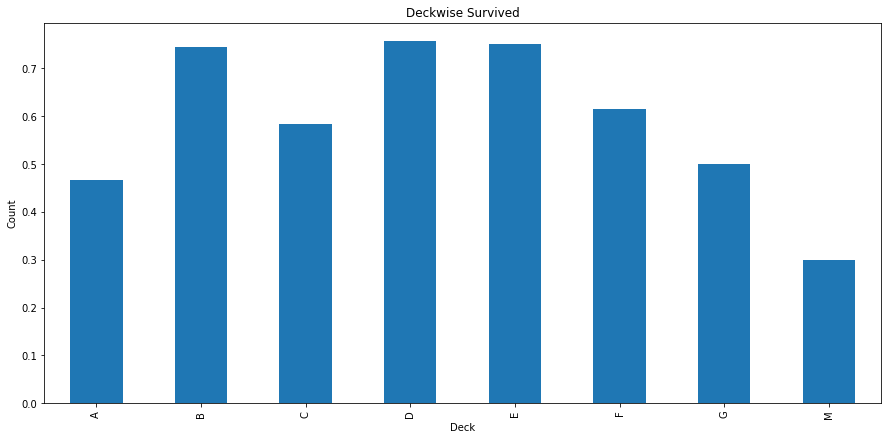

In [ ]:
dataset[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar',figsize=(15,7),title='Deckwise Survived',ylabel='Count')

In [ ]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Survived,418,31.9
Family_Size,0,0.0
Title,0,0.0
Deck,0,0.0
Ticket,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
PassengerId,0,0.0
Parch,0,0.0


We have now fixed all issues of missing values, we can now proceed to feature engineering.

###Feature Engineering
We will first make use of the name column to extract a feature called Title, we will then group together similar titles.

In [ ]:
dataset['Title']=dataset['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Title'].value_counts()

Mr              757
Miss            264
Mrs             198
Master           61
Rev               8
Dr                8
Col               4
Major             2
Don               1
Dona              1
the Countess      1
Jonkheer          1
Lady              1
Capt              1
Sir               1
Name: Title, dtype: int64

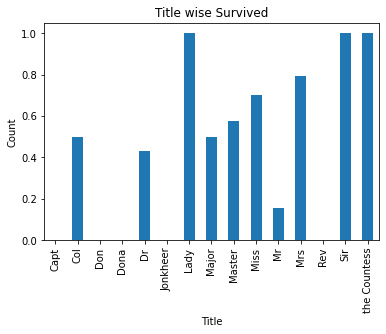

In [ ]:
dataset[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',title='Title wise Survived',ylabel='Count')

Interpreting these titles:

Don and Dona are titles for elderly man and woman - it can be changed to Mr and Mrs.

We can group together Col, Major and Capt as Military titles

We can group together Lady, Sir and Countess as Royalty.

We can group together Dr. and Rev. as Service.

In [ ]:
dataset['Title'] = dataset['Title'].replace('Don', 'Mr')
dataset['Title'] = dataset['Title'].replace('Jonkheer', 'Mr')
dataset['Title'] = dataset['Title'].replace('Dona', 'Mrs')
dataset['Title'] = dataset['Title'].replace('Col', 'Mil')
dataset['Title'] = dataset['Title'].replace('Capt', 'Mil')
dataset['Title'] = dataset['Title'].replace('Major', 'Mil')
dataset['Title'] = dataset['Title'].replace('Lady', 'Royal')
dataset['Title'] = dataset['Title'].replace('Sir', 'Royal')
dataset['Title'] = dataset['Title'].replace('the Countess', 'Royal')
dataset['Title'] = dataset['Title'].replace('Mil','Service')
dataset['Title'] = dataset['Title'].replace('Dr','Service')

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket', 'Deck', 'Title', 'Family_Size'],
      dtype='object')

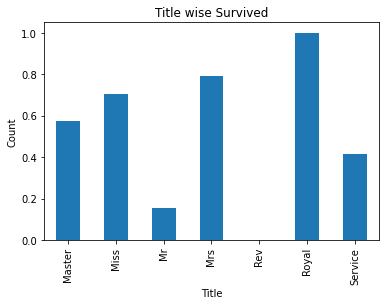

In [ ]:
dataset[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',title='Title wise Survived',ylabel='Count')
dataset.columns

We can engineer a new feature called Family Size, since we observed that number of accompanying people made an impact on survival and reduced the chances after family size bigger than 4. 

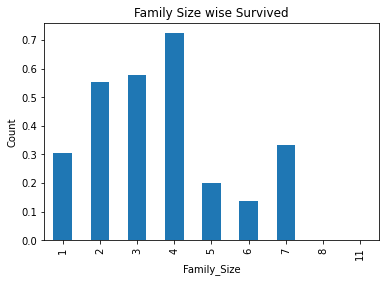

In [ ]:
dataset['Family_Size']=dataset['SibSp']+dataset['Parch']+1
dataset[['Family_Size','Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar',title='Family Size wise Survived',ylabel='Count')

We can see that the survival is maximum at 70% for families of size 4, and then falls significantly for families with number of members more than 4. Hence we will label family size as 1,2,3,4 for 1,2,3,4 respectively and 5 for any families with number of members more than 4.

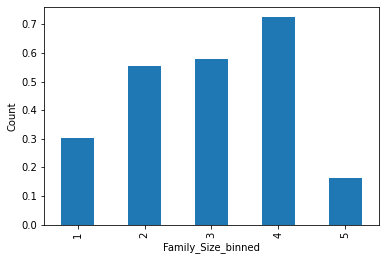

In [ ]:
dataset['Family_Size_binned']=dataset['Family_Size'].map(lambda size: 1 if size==1 else (2 if size==2 else (3 if size==3 else (4 if size==4 else 5))))
dataset['Family_Size_binned'].value_counts()
dataset[['Family_Size_binned','Survived']].groupby('Family_Size_binned')['Survived'].mean().plot(kind='bar',ylabel='Count')

During EDA, we came to understand that women accompanied by children who are not in 3rd class have an almost full probability of survival, we shall make this one feature.

In [ ]:
dataset['Priority_passenger']= np.where( ((dataset['Parch']>=1) & (dataset['Age']<18.0) & (dataset['Pclass']!=3)) | ((dataset['Sex']=='female')  & (dataset['Parch']>=1) & (dataset['Pclass'] !=3)), 1, 0 )

We will now bin the continuous variables of Fare and Age.

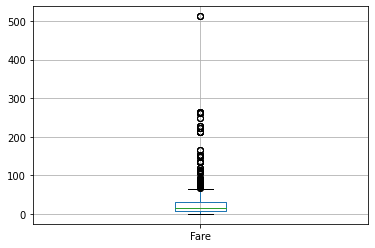

In [ ]:
dataset.boxplot(column='Fare')

We will use qcut to see decide on what distributions of Fare we want to take.

In [ ]:
dataset['Fare_bins']=pd.qcut(dataset['Fare'],10)

In [ ]:
dataset['Fare_bins'].value_counts()

(7.867, 8.05]       147
(22.358, 27.721]    136
(14.458, 22.358]    132
(78.02, 512.329]    131
(11.293, 14.458]    131
(7.728, 7.867]      131
(-0.001, 7.728]     131
(41.579, 78.02]     128
(27.721, 41.579]    127
(8.05, 11.293]      115
Name: Fare_bins, dtype: int64

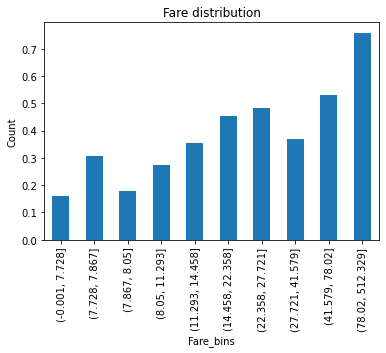

In [ ]:
dataset[['Fare_bins','Survived']].groupby('Fare_bins')['Survived'].mean().plot(kind='bar',title='Fare distribution',ylabel='Count')
dataset['fare_7.728_7.867']=np.where( ((dataset['Fare']>=7.728)&(dataset['Fare']<7.867)), 1, 0 )
dataset['fare_7.867_8.05']=np.where( ((dataset['Fare']>=7.867)&(dataset['Fare']<8.05)), 1, 0 )
dataset['fare_8.05_11.293']=np.where( ((dataset['Fare']>=8.05)&(dataset['Fare']<11.293)), 1, 0 )
dataset['fare_11.293_14.458']=np.where( ((dataset['Fare']>=11.293)&(dataset['Fare']<14.458)), 1, 0 )
dataset['fare_14.458_22.358']=np.where( ((dataset['Fare']>=14.458)&(dataset['Fare']<22.358)), 1, 0 )
dataset['fare_22.358_27.721']=np.where( ((dataset['Fare']>=22.358)&(dataset['Fare']<27.721)), 1, 0 )
dataset['fare_27.721_41.579']=np.where( ((dataset['Fare']>=27.721)&(dataset['Fare']<41.579)), 1, 0 )
dataset['fare_41.579_78.02']=np.where( ((dataset['Fare']>=41.579)&(dataset['Fare']<78.02)), 1, 0 )
dataset['fare_78.02_512.329']=np.where( ((dataset['Fare']>=78.02)&(dataset['Fare']<512.329)), 1, 0 )

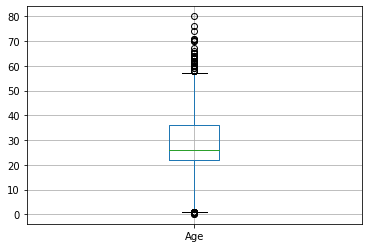

In [ ]:
dataset.boxplot(column='Age')

In [ ]:
dataset['Age_bins']=pd.cut(dataset['Age'].astype(int),5)
dataset['Age_bins'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age_bins, dtype: int64

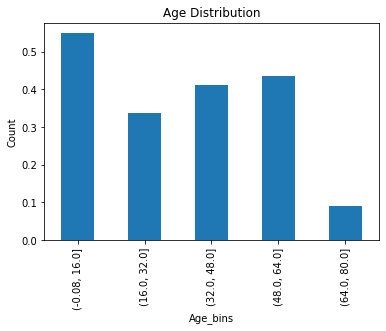

In [ ]:
dataset[['Age_bins','Survived']].groupby('Age_bins')['Survived'].mean().plot(kind='bar',title='Age Distribution',ylabel='Count')
dataset['age_0_16']=np.where( ((dataset['Age']>=0)&(dataset['Age']<16)), 1, 0 )
dataset['age_32_48']=np.where( ((dataset['Age']>=32)&(dataset['Age']<48)), 1, 0 )
dataset['age_48_64']=np.where( ((dataset['Age']>=48)&(dataset['Age']<64)), 1, 0 )
dataset['age_64_80']=np.where( (dataset['Age']>=64), 1, 0 )

Now that we've engineered all the required features we will drop the actual columns based on which these features were created, from the dataset

In [ ]:
dataset=dataset.drop(columns=['Name','Parch','SibSp','Ticket','Family_Size','Age','Age_bins','Fare','Fare_bins'])
dataset.columns

Index(['Embarked', 'PassengerId', 'Pclass', 'Sex', 'Survived', 'Deck', 'Title',
       'Family_Size_binned', 'Priority_passenger', 'fare_7.728_7.867',
       'fare_7.867_8.05', 'fare_8.05_11.293', 'fare_11.293_14.458',
       'fare_14.458_22.358', 'fare_22.358_27.721', 'fare_27.721_41.579',
       'fare_41.579_78.02', 'fare_78.02_512.329', 'age_0_16', 'age_32_48',
       'age_48_64', 'age_64_80'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Embarked            1309 non-null   object 
 1   PassengerId         1309 non-null   int64  
 2   Pclass              1309 non-null   int64  
 3   Sex                 1309 non-null   object 
 4   Survived            891 non-null    float64
 5   Deck                1309 non-null   object 
 6   Title               1309 non-null   object 
 7   Family_Size_binned  1309 non-null   int64  
 8   Priority_passenger  1309 non-null   int64  
 9   fare_7.728_7.867    1309 non-null   int64  
 10  fare_7.867_8.05     1309 non-null   int64  
 11  fare_8.05_11.293    1309 non-null   int64  
 12  fare_11.293_14.458  1309 non-null   int64  
 13  fare_14.458_22.358  1309 non-null   int64  
 14  fare_22.358_27.721  1309 non-null   int64  
 15  fare_27.721_41.579  1309 non-null   int64  
 16  fare_4

Here apart from Fare and Age all our variables are Categorical. We will use dummy encoding to convert these to numeric.

In [ ]:
dataset_catboost=dataset
df_embarked= pd.get_dummies(dataset['Embarked'], prefix='embarked',drop_first=True)
df_sex = pd.get_dummies(dataset['Sex'],prefix='sex',drop_first=True)
df_plcass = pd.get_dummies(dataset['Pclass'],prefix='pclass',drop_first=True)
df_deck = pd.get_dummies(dataset['Deck'],prefix='deck',drop_first=True)
df_title = pd.get_dummies(dataset['Title'],prefix='title',drop_first=True)
df_family_size_binned = pd.get_dummies(dataset['Family_Size_binned'],prefix='family_of',drop_first=True)
df_priority_passenger = pd.get_dummies(dataset['Priority_passenger'],prefix='priority_passenger',drop_first=True)
# Combine the one hot encoded columns with dataset
dataset = pd.concat([dataset,df_embarked,df_sex,df_plcass,df_deck,df_title,df_family_size_binned,df_priority_passenger], axis=1)
dataset=dataset.drop(columns=['Embarked','Sex','Pclass','Deck','Title','Family_Size_binned','Priority_passenger'])
dataset.columns

Index(['PassengerId', 'Survived', 'fare_7.728_7.867', 'fare_7.867_8.05',
       'fare_8.05_11.293', 'fare_11.293_14.458', 'fare_14.458_22.358',
       'fare_22.358_27.721', 'fare_27.721_41.579', 'fare_41.579_78.02',
       'fare_78.02_512.329', 'age_0_16', 'age_32_48', 'age_48_64', 'age_64_80',
       'embarked_Q', 'embarked_S', 'sex_male', 'pclass_2', 'pclass_3',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_M',
       'title_Miss', 'title_Mr', 'title_Mrs', 'title_Rev', 'title_Royal',
       'title_Service', 'family_of_2', 'family_of_3', 'family_of_4',
       'family_of_5', 'priority_passenger_1'],
      dtype='object')

###Feature Importance
Now that we are done with creating new features and one-hot encoding the categorical features, let us compute feature importances for the features we have in our dataset, including the new ones created.

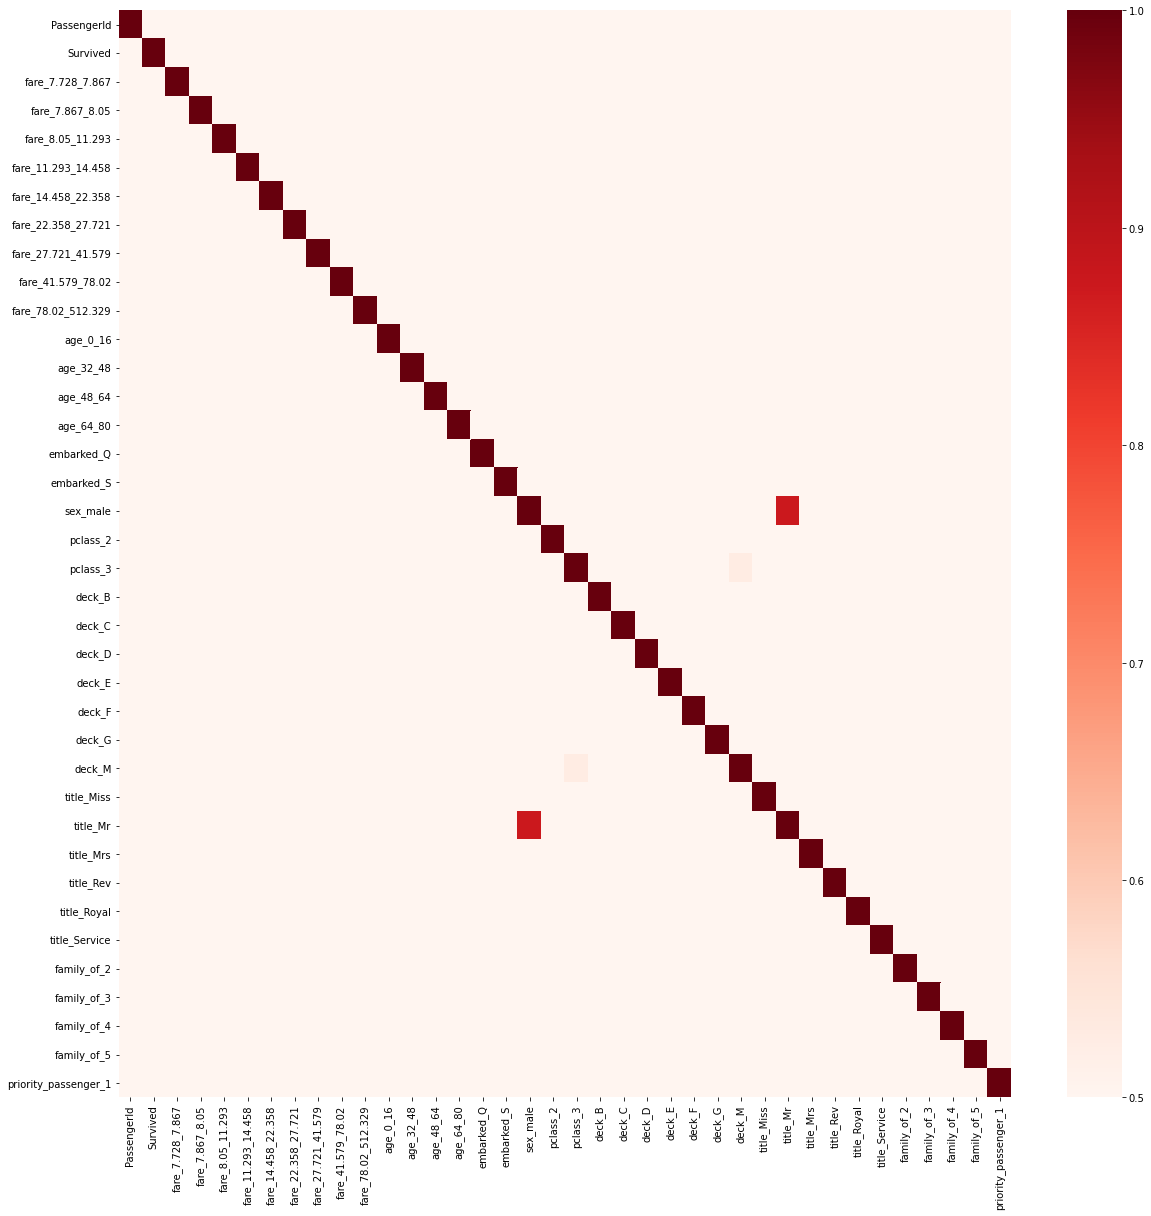

In [ ]:
plt.figure(figsize=(20,20))
cor=dataset.corr()
sns.heatmap(cor, cmap=plt.cm.Reds,vmin=0.5)
plt.show()

We can see that there is high correlation between Deck M and pclass_3 and title_Mr and sex_Male, we can check this in depth through VIF.

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Survived'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Survived                1.000000
fare_78.02_512.329      0.242915
sex_male                0.543351
pclass_3                0.322308
deck_M                  0.316912
title_Miss              0.335636
title_Mr                0.553204
title_Mrs               0.341994
priority_passenger_1    0.356221
Name: Survived, dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data=dataset.drop(columns=['Survived','PassengerId'])
#print(multicollinear.columns)
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                         for i in range(len(data.columns))]
  
vif_data[vif_data['VIF']>10]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
15,sex_male,73.968024
17,pclass_3,22.204120
24,deck_M,60.451362
25,title_Miss,18.513233
26,title_Mr,24.333924
27,title_Mrs,15.114786


We will now drop a few of these highly correlated columns and check if the high VIFs are removed.

In [ ]:
multicollinear=dataset.drop(columns=['Survived','PassengerId','title_Mr','deck_M','title_Miss'])
#print(multicollinear.columns)
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = multicollinear.columns
  
#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(multicollinear.values, i)
                         for i in range(len(multicollinear.columns))]
  
vif_data[vif_data['VIF']>10]

,feature,VIF


In [ ]:
dataset=dataset.drop(columns=['title_Mr','deck_M'])

In [ ]:
training = dataset.loc[:890]
training.columns

Index(['PassengerId', 'Survived', 'fare_7.728_7.867', 'fare_7.867_8.05',
       'fare_8.05_11.293', 'fare_11.293_14.458', 'fare_14.458_22.358',
       'fare_22.358_27.721', 'fare_27.721_41.579', 'fare_41.579_78.02',
       'fare_78.02_512.329', 'age_0_16', 'age_32_48', 'age_48_64', 'age_64_80',
       'embarked_Q', 'embarked_S', 'sex_male', 'pclass_2', 'pclass_3',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'title_Miss', 'title_Mrs', 'title_Rev', 'title_Royal', 'title_Service',
       'family_of_2', 'family_of_3', 'family_of_4', 'family_of_5',
       'priority_passenger_1'],
      dtype='object')

Since our distribution of data in both the classes are different - ~39% and 61%. We will use Undersampling to balance both the classes, so as to avoid Bias and reduce overfitting of our model to either one of the classes.

In [ ]:
not_survived_dataset=training[training['Survived']==0]
survived_dataset=training[training['Survived']==1]
print("Survived: ",survived_dataset.shape)
print("Not Survived :",not_survived_dataset.shape)
min_val = min(len(survived_dataset),len(not_survived_dataset))
not_survived_dataset = not_survived_dataset.sample(min_val,random_state=100)
survived_dataset = survived_dataset.sample(min_val,random_state=100)
print("After Resampling")
print("Survived: ",survived_dataset.shape)
print("Not Survived :",not_survived_dataset.shape)
train_set = pd.concat([survived_dataset,not_survived_dataset],axis = 0)
training=train_set.copy()
print("New Training dataset ",training.shape)

Survived:  (342, 36)
Not Survived : (549, 36)
After Resampling
Survived:  (342, 36)
Not Survived : (342, 36)
New Training dataset  (684, 36)


In [ ]:
test = dataset.loc[891:]
test.columns

Index(['PassengerId', 'Survived', 'fare_7.728_7.867', 'fare_7.867_8.05',
       'fare_8.05_11.293', 'fare_11.293_14.458', 'fare_14.458_22.358',
       'fare_22.358_27.721', 'fare_27.721_41.579', 'fare_41.579_78.02',
       'fare_78.02_512.329', 'age_0_16', 'age_32_48', 'age_48_64', 'age_64_80',
       'embarked_Q', 'embarked_S', 'sex_male', 'pclass_2', 'pclass_3',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'title_Miss', 'title_Mrs', 'title_Rev', 'title_Royal', 'title_Service',
       'family_of_2', 'family_of_3', 'family_of_4', 'family_of_5',
       'priority_passenger_1'],
      dtype='object')

Now that the undersampling is done, and our combined dataset is seperated back into training (with survival labels) and test(without survival labels - to be predicted and submitted to Kaggle) we will normalize and scale our data.

In [ ]:
X=pp.StandardScaler().fit_transform(training.drop(columns=['Survived','PassengerId']))
X=training.drop(columns=['Survived','PassengerId'],axis=1)
y=training['Survived'].values
X_test=pp.StandardScaler().fit_transform(test.drop(columns=['Survived','PassengerId']))
X_test= test.drop(columns=['Survived','PassengerId'])
print ("X: ",X.shape)
print("Y :",y.shape)
print("X_test :",X_test.shape)
print(X.columns)

X:  (684, 34)
Y : (684,)
X_test : (418, 34)
Index(['fare_7.728_7.867', 'fare_7.867_8.05', 'fare_8.05_11.293',
       'fare_11.293_14.458', 'fare_14.458_22.358', 'fare_22.358_27.721',
       'fare_27.721_41.579', 'fare_41.579_78.02', 'fare_78.02_512.329',
       'age_0_16', 'age_32_48', 'age_48_64', 'age_64_80', 'embarked_Q',
       'embarked_S', 'sex_male', 'pclass_2', 'pclass_3', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'title_Miss', 'title_Mrs',
       'title_Rev', 'title_Royal', 'title_Service', 'family_of_2',
       'family_of_3', 'family_of_4', 'family_of_5', 'priority_passenger_1'],
      dtype='object')


We will additionally use RFECV to predict feature importances.

In [ ]:
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFECV
model = DecisionTreeClassifier()
#Initializing RFE model
rfe = RFECV(estimator=DecisionTreeClassifier())
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
cols=list(training.columns)
cols.remove('Survived')
cols.remove('PassengerId')
for i in range(X.shape[1]):
  if rfe.support_[i]==True :
  	print('Column: %s, Rank: %.3f' % (cols[i], rfe.ranking_[i]))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True False False  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 1 3 5 1 1 1 1 1 1]
Column: fare_7.728_7.867, Rank: 1.000
Column: fare_7.867_8.05, Rank: 1.000
Column: fare_8.05_11.293, Rank: 1.000
Column: fare_11.293_14.458, Rank: 1.000
Column: fare_14.458_22.358, Rank: 1.000
Column: fare_22.358_27.721, Rank: 1.000
Column: fare_27.721_41.579, Rank: 1.000
Column: fare_41.579_78.02, Rank: 1.000
Column: fare_78.02_512.329, Rank: 1.000
Column: age_0_16, Rank: 1.000
Column: age_32_48, Rank: 1.000
Column: age_48_64, Rank: 1.000
Column: age_64_80, Rank: 1.000
Column: embarked_Q, Rank: 1.000
Column: embarked_S, Rank: 1.000
Column: sex_male, Rank: 1.000
Column: pclass_2, Rank: 1.000
Column: pclass_3, Rank: 1.000
Column: deck_B, Rank: 1.000
Column: deck_C, Rank: 1.000
Column: deck_D, Rank: 1.000
Column: d

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


We will now split our dataset into train and test in order to train the data with ML models. For the purpose of this notebook we will be using RandomForestClassifier() and XGBoostClassifier()

In [ ]:
X_train,X_test1,y_train,y_test1 = train_test_split(X,y,test_size=0.25,random_state=779)

###Hyperparameter Tuning
We will now tune the hyperparameters for the first ML model we plan to use - Random Forest Classifier.  We will use RandomSearchCV for choosing the best hyperparameters for the Random Forest

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=405, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]},
                   random_state=405, verbose=2)

In [ ]:
print('The best parameters after tuning are: ')
print()
print(rf_random.best_params_)

The best parameters after tuning are: 

{'n_estimators': 1700, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini', 'bootstrap': False}


Now that we have the best parameters,we will use that to train the RandomForest model and predict over the test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


#X_train,X_test1,y_train,y_test1 = train_test_split(X,y,test_size=0.25,random_state=428)

rf_model = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, random_state=495,min_samples_leaf= 4, max_features= 'sqrt', max_depth= 50, criterion= 'gini', bootstrap=False)

rf_model.fit(X_train,y_train)
#predictions = model.predict(X_test1)

print("Model accuracy score is :",rf_model.score(X_test1,y_test1))

# Cross Validation 
train_pred = model_selection.cross_val_predict(rf_model,X,y,cv=10,n_jobs = -1)

# Cross-validation accuracy metric
acc_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)

print("Cross validation accuracy is ",acc_cv)

Model accuracy score is : 0.8187134502923976
Cross validation accuracy is  81.14


In [ ]:
model_output=rf_model.predict(X_test1)
print(metrics.confusion_matrix(y_test1, model_output,labels=[0,1]))
print(metrics.classification_report(y_test1, model_output, labels=[0,1]))

[[70 12]
 [19 70]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        82
           1       0.85      0.79      0.82        89

    accuracy                           0.82       171
   macro avg       0.82      0.82      0.82       171
weighted avg       0.82      0.82      0.82       171



We can see that as per the precision value, for label 0,  79% of the times when our model predicted 0, it was correct. The recall value of 85% means that we got 85% of all the actual 0s right.

We can see that as per the precision value, for label 0,  85% of the times when our model predicted 0, it was correct. The recall value of 79% means that we got 79% of all the actual 0s right.

In [ ]:
predictions_rf = rf_model.predict(X_test)
output=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predictions_rf})
output['Survived']=output['Survived'].astype(int)
output.to_csv('RandomForestClassifier_v10.csv',index=False)

We will now tune the hyperparameters for XGBoost with GridSearchCV and use it to predict over the test dataset.

In [ ]:
from xgboost import XGBClassifier
n_estimators = [8,10,11,12,13,14] #,100,200]
learning_rates = [0.3, 0.25, 0.2, 0.15, 0.1] #, 0.05, 0.03]
max_depth = [3]
reg_lambda = [.43, .44, .45, .46,.47, .48]
colsample_bytree = [.8, .9, 1]
reg_alpha = [0] #, 1e-06, 1e-07] #, 0.002, 0.003] #, 0.004, 0.005, 0.01]
booster = ['gbtree'] #, 'gblinear', 'dart']

tuned_param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 
                    'reg_lambda': reg_lambda, 'reg_alpha': reg_alpha,
                    'colsample_bytree': colsample_bytree, 'booster': booster
                   }

print(tuned_param_grid)

{'n_estimators': [8, 10, 11, 12, 13, 14], 'learning_rate': [0.3, 0.25, 0.2, 0.15, 0.1], 'max_depth': [3], 'reg_lambda': [0.43, 0.44, 0.45, 0.46, 0.47, 0.48], 'reg_alpha': [0], 'colsample_bytree': [0.8, 0.9, 1], 'booster': ['gbtree']}


In [ ]:
from sklearn.model_selection import GridSearchCV
def train_model(estimator_class, param_grid, X_train, X_test, y_train, y_test, verbose=0):
    estimator = estimator_class()
    
    if verbose==1:
        print('Training ' + type(estimator).__name__ + '...')
    
    
    cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = GridSearchCV(estimator, param_grid, refit=True, cv=cv, scoring='accuracy', verbose=verbose, n_jobs=-1)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = round(model.score(X_test, y_test) * 100, 3)

    
    return  model.best_estimator_, model.best_params_, round(model.best_score_*100,3)

In [ ]:
xgb_tuned, xgb_tuned_params, xgb_accuracy = train_model(XGBClassifier, tuned_param_grid, X_train, X_test1, y_train, y_test1, verbose=1)

Training XGBClassifier...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [ ]:
print("Model score:", xgb_accuracy)
train_pred = model_selection.cross_val_predict(xgb_tuned, 
                                                  X, 
                                                  y,
                                                  cv=10, 
                                                  n_jobs = -1)
# Cross-validation accuracy metric
acc_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)
print("CV score: ",acc_cv)

Model score: 82.071
CV score:  81.29


In [ ]:
model_output=xgb_tuned.predict(X_test1)
print(metrics.confusion_matrix(y_test1, model_output,labels=[0,1]))
print(metrics.classification_report(y_test1, model_output, labels=[0,1]))

[[72 10]
 [22 67]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        82
           1       0.87      0.75      0.81        89

    accuracy                           0.81       171
   macro avg       0.82      0.82      0.81       171
weighted avg       0.82      0.81      0.81       171



We can see that as per the precision value, for label 0,  77% of the times when our model predicted 0, it was correct. The recall value of 88% means that we got 88% of all the actual 0s right.

We can see that as per the precision value, for label 1,  87% of the times when our model predicted 0, it was correct. The recall value of 75% means that we got 75% of all the actual 0s right.

In [ ]:
predictions_xgb = xgb_tuned.predict(X_test)
output=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predictions_xgb})
output['Survived']=output['Survived'].astype(int)
output.to_csv('XGB_v7.csv',index=False)

We have successfully run both the models, and achieved accuracy of ~80% and similar cross validation scores.

###SHAP Interpretability

We will now interpret the RandomForestModel (best performing as per Kaggle submission) using SHAP. We will first install and import the necessary libraries.

In [ ]:
!pip install plotly

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509235 sha256=6a51aaa2a5b7d1c710f7cbd04c3d81e04f1e15d93515b29a037b9425509ea542
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
!pip install numba

In [ ]:
import plotly
import shap
best_model=rf_model
print(best_model.feature_importances_)

[0.00259735 0.00213215 0.01940928 0.00631584 0.00764028 0.004409
 0.01140991 0.01786114 0.03017639 0.03402668 0.0076352  0.00467327
 0.00036812 0.00756437 0.02536599 0.2926503  0.01922458 0.07293635
 0.01230829 0.00749145 0.00767155 0.01916696 0.00064452 0.
 0.10903516 0.10059721 0.00185646 0.         0.00055964 0.02132982
 0.01522735 0.00391394 0.03636326 0.09743819]


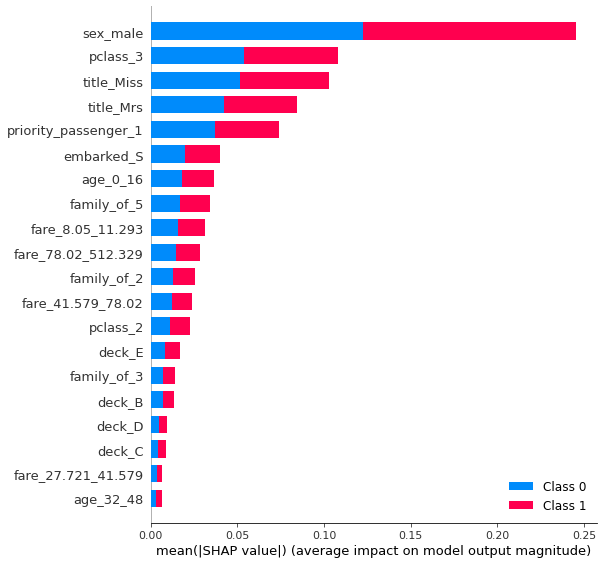

In [ ]:
model=rf_model
explainer=shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(training.drop(columns=['PassengerId','Survived']))
shap.summary_plot(shap_values, training.drop(columns=['PassengerId','Survived']), plot_type="bar")

We can see that SHAP has interpreted the important features as Sex, Pclass and Title Miss and Mrs, which is in line with sex Female.

The new feature we engineered - Priority Passenger - is also among the most important features.

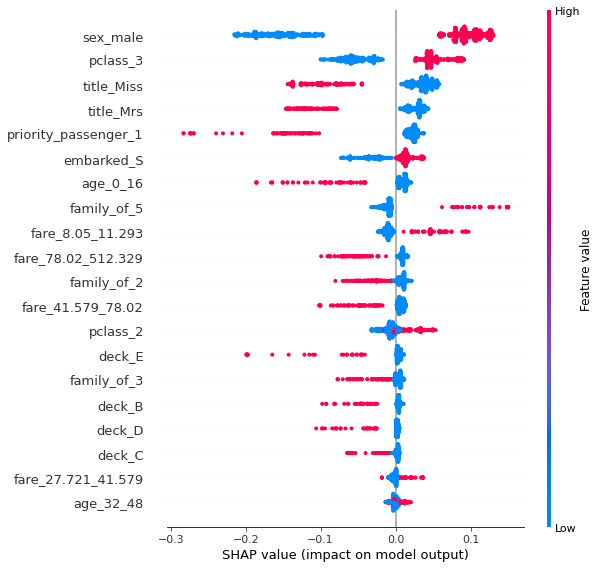

In [ ]:
#Did not survive - i.e. SURVIVED = 0
shap.summary_plot(shap_values[0], training.drop(columns=['PassengerId','Survived']))

While interpreting the SHAP values for a prediction label that was a passenger who did not survive, we can see high values for Sex male i.e 1, high values for Pclass2, low values of low age (i.e not child)

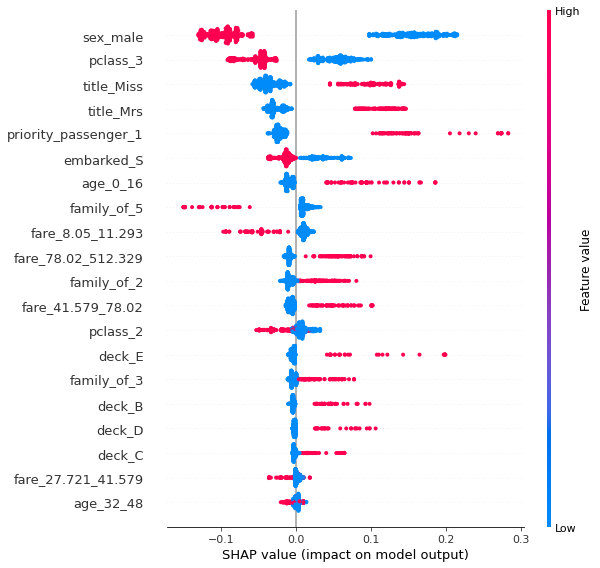

In [ ]:
#Did survive - i.e. SURVIVED = 1
shap.summary_plot(shap_values[1], training.drop(columns=['PassengerId','Survived']))

While interpreting the SHAP values for a prediction label that was a passenger who did not survive, we can see low values for Sex male i.e 0 and it's woman, low values for Pclass2(i.e upper class passenger), high values of low age (i.e child)

Our observations with respect to the Summary plot is very much in sync with what we were able to observe during EDA as well as the information gathered from the feature importances.

We will now take a look at two specific predictions (one for each class label) and take a look at the strong influencing features for each of those classifications.

In [ ]:
row=X_train.iloc[109]
shap_values=explainer.shap_values(row)
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0],row)

The above is an instance of a person whose Survive value = 0, we can see that the major contributing factors to their prediction is Sex_male being 1, and fare window which is not a large fare, which meant they were not an upper class traveller. Title_Miss and title_Mrs being 0 are also significant contributors.

In [ ]:
row=X_train.iloc[56]
shap_values=explainer.shap_values(row)
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],row)

The above is an example of a passenger who survived the shipwreck - we can see that the major influencing factors is sex_male=0(i.e. the passenger was female), title_Mrs, which indicates a married woman, they have pclass3, pclass2  as 0, i.e. they are an upper class passenger.

###What is unique in this notebook

Although the titanic dataset is a very common ML problem, we have taken a few different approaches to the problem in comparison with other notebooks available on Kaggle and other resources.

We have engineered new features based on the extensive EDA performed and created new features such as Deck, Title,FamilySize, Fare and Age as bins so as to help the model train better. 
Another unique feature we created in this notebook is the feature called priority passenger - which sets apart those passengers who, according to research were given priority boarding on the titanic lifeboats.

Additionally, we have also performed SHAP interpretability on the trained model so as to understand which features contribute significantly to the two classification classes. One point to note is that SHAP also pointed out one of our newly engineered features, Priority Passenger is an important feature in the prediction of survival of titanic passengers.

##Conclusion

In conclusion, we were able to predict the survival of titanic passengers to an accuracy of ~81%. Submission of the RandomForest predictions from this notebook led to a score of top 8% in the Kaggle competition.
The most important features were observed as below-
1. Sex - Women were more likely to survive than men
2. Pclass - passengers in upper classes Pclass=1 and 2, were more likely to survive
3. Women and Children - our calculated column where we pin pointed women travelling with children turned out to be an important feature and such passengers were more likely to survive
4. Family Size - Larger families were unlikely to survive
5. Deck - The decks we were able to calculate from the Ticket numbers were good predictors, however Deck_M - Missing decks did not rank anywhere in the feature importances.

##Contributions

1. https://www.kaggle.com/abigailchoi/getting-started-with-titanic77
2. https://www.kaggle.com/victorsullivan/titanic-records
3. https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf
4. https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704
5. https://medium.com/backprop-labs/kaggle-submission-for-titanic-dataset-fd7950a0d65
6. https://github.com/slundberg/shap/issues/367

This notebook uses ideas from the above Kernels and articles with additional features and ideas implemented as detailed in previous sections

##References 

1. https://www.kaggle.com/competitions
2. https://www.kaggle.com/natigmamishov/titanic-eda-fe-svc-0-80622
3. https://medium.com/backprop-labs/kaggle-submission-for-titanic-dataset-fd7950a0d65

4. https://groups.google.com/g/pystatsmodels/c/xRO8dYgyzOw?pli=1
5. https://machinelearningmastery.com/
6. https://github.com/nikbearbrown
7. https://stackoverflow.com/
8. https://www.itl.nist.gov/div898/handbook/eda/section3/eda3665.htm 
9. https://towardsdatascience.com/
10.https://scikit-learn.org/
11.Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Copyright 2021 | Shika Shyam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.